,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


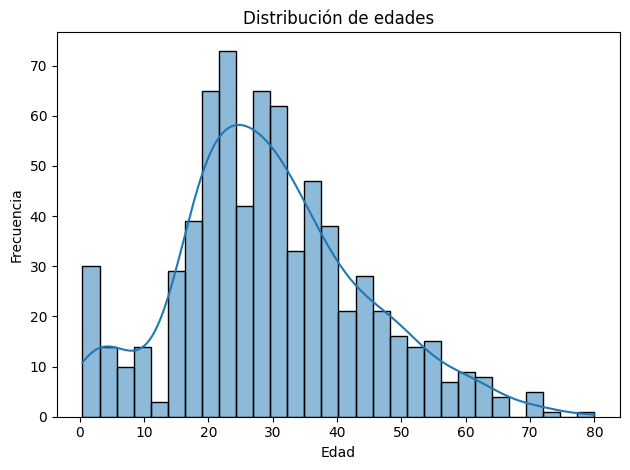

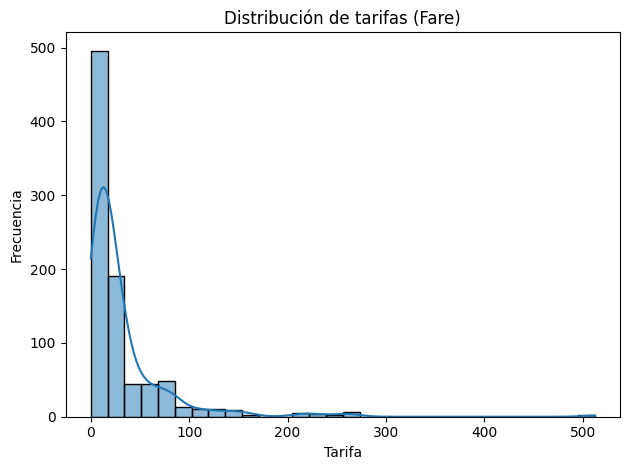

Supervivencia media por clase:
Pclass
1    0.630
2    0.473
3    0.242
Name: Survived, dtype: float64

Supervivencia media por sexo:
Sex
female    0.742
male      0.189
Name: Survived, dtype: float64

Supervivencia media por puerto (Embarked):
Embarked
C    0.554
Q    0.390
S    0.337
Name: Survived, dtype: float64


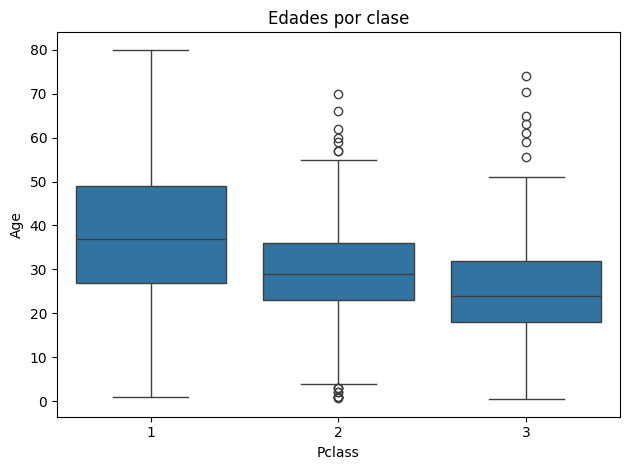

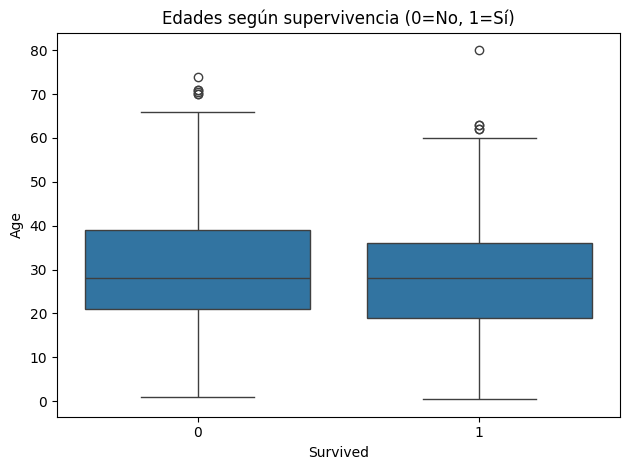

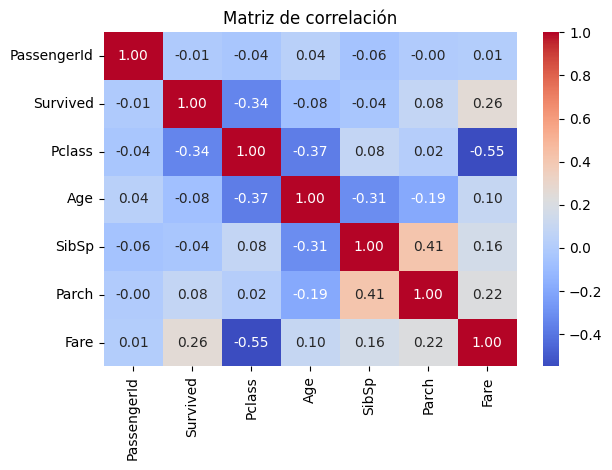


Edad media de quienes sobrevivieron: 28.34
Edad media de quienes NO sobrevivieron: 30.63

Tarifa media por clase:
Pclass
1    84.15
2    20.66
3    13.68
Name: Fare, dtype: float64


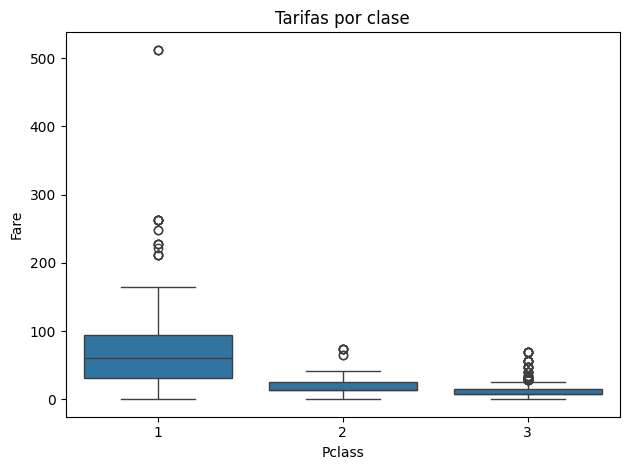


Correlación entre Fare y Survived: 0.257

Supervivencia media por clase (ratio):
Pclass
1    0.630
2    0.473
3    0.242
Name: SurvivalRate, dtype: float64


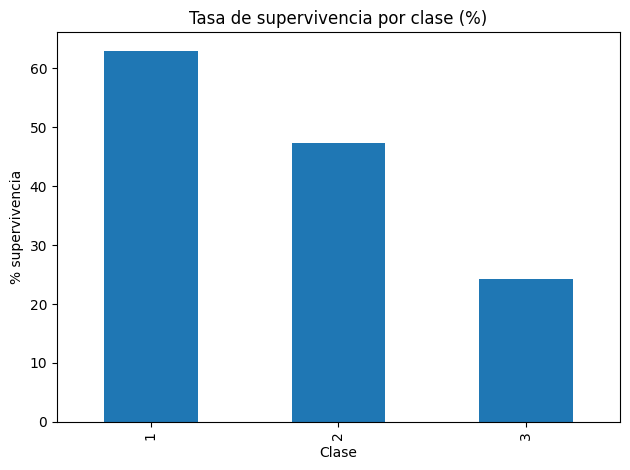


Distribución por clase (por fila):


,No sobrevivió,Sobrevivió
Pclass,,
1,0.370,0.630
2,0.527,0.473
3,0.758,0.242


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pc = pd.read_csv("../data/train.csv")

# Vista rápida
display(pc.head())

#  Distribuciones 
sns.histplot(pc["Age"].dropna(), bins=30, kde=True)
plt.title("Distribución de edades")
plt.xlabel("Edad"); plt.ylabel("Frecuencia"); plt.tight_layout()
plt.show()

sns.histplot(pc["Fare"], bins=30, kde=True)
plt.title("Distribución de tarifas (Fare)")
plt.xlabel("Tarifa"); plt.ylabel("Frecuencia"); plt.tight_layout()
plt.show()

#  Supervivencia por clase/sexo/puerto 
print("Supervivencia media por clase:")
print(pc.groupby("Pclass")["Survived"].mean().round(3))

print("\nSupervivencia media por sexo:")
print(pc.groupby("Sex")["Survived"].mean().round(3))

print("\nSupervivencia media por puerto (Embarked):")
print(pc.groupby("Embarked")["Survived"].mean().round(3))

#  Boxplots 
sns.boxplot(data=pc, x="Pclass", y="Age")
plt.title("Edades por clase"); plt.tight_layout(); plt.show()

sns.boxplot(data=pc, x="Survived", y="Age")
plt.title("Edades según supervivencia (0=No, 1=Sí)"); plt.tight_layout(); plt.show()

# Correlaciones numéricas 
corr = pc.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación"); plt.tight_layout(); plt.show()

print("\nEdad media de quienes sobrevivieron:",
      round(pc.loc[pc["Survived"]==1, "Age"].mean(), 2))
print("Edad media de quienes NO sobrevivieron:",
      round(pc.loc[pc["Survived"]==0, "Age"].mean(), 2))

# Tarifa por clase (tabla + boxplot)
print("\nTarifa media por clase:")
print(pc.groupby("Pclass")["Fare"].mean().round(2))

sns.boxplot(data=pc, x="Pclass", y="Fare")
plt.title("Tarifas por clase"); plt.tight_layout(); plt.show()

# Correlación Fare vs Survived
print("\nCorrelación entre Fare y Survived:",
      round(pc["Fare"].corr(pc["Survived"]), 3))

# Supervivencia por clase (porcentajes legibles)
tarifa_supervivientes = pc.groupby("Pclass")["Survived"].mean().rename("SurvivalRate")
print("\nSupervivencia media por clase (ratio):")
print(tarifa_supervivientes.round(3))

(tarifa_supervivientes*100).plot(kind="bar")
plt.title("Tasa de supervivencia por clase (%)")
plt.ylabel("% supervivencia"); plt.xlabel("Clase"); plt.tight_layout(); plt.show()

# tabla 2xN con porcentajes por filas (más legible en informes)
tabla = pd.crosstab(pc["Pclass"], pc["Survived"], normalize="index").round(3)
tabla.columns = ["No sobrevivió", "Sobrevivió"]
print("\nDistribución por clase (por fila):")
display(tabla)
